# ROC Curve

ROC curves typically feature true positive rate (**recall**) on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the **ideal point**. Although this is not very realistic, it means that a larger area under the the curve (AUC) is usually better. The **steepness** of the ROC is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

**Properties**
* The **curve** visualizes the quality of the ranker or probabilistic model on a test set, without commiting the classification threshold: It aggregates all possible thresholds.
* The **slope** of the curve indicates class distribution in that segment of the ranking: diagonal segment indicates locally random behaviour
* **Cocavities** indicate locally worse than random behaviour

##  AUC

The Area Under ROC Curve assesses the ranking in terms of separation of the classes

* **AUC = 1** -> All the positives before the negatives
* **AUC = 0.5** -> Random Ordering
* **AUC = 0** -> All the negatives before the positives

ROC-curves and AUC are only defined for two-class problems (concept learning). 
You could always just look at your ROC curve. Each point on the ROC curve corresponds to a separate confusion matrix. So by specifying the confusion matrix you want, via choosing your classifier threshold implies some sort of cost weighting scheme. Then you just have to choose the confusion matrix that would imply the cost matrix you are looking for.


For different cut-off values, any model would exhibit different performances; thus, contingency tables could be used as a mean of assesment of competing models only for a given cutoff value. In order to represent the model performance for allposible cut-off values, the most popular graphic representations are the CAP and ROC curves.

In [2]:
%matplotlib inline

In [5]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split

iris = datasets.load_iris()
X = iris.data[:, [2,3]] # we use two features for visualization purposes
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)

Pipeline(steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, n_components=2, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0))])

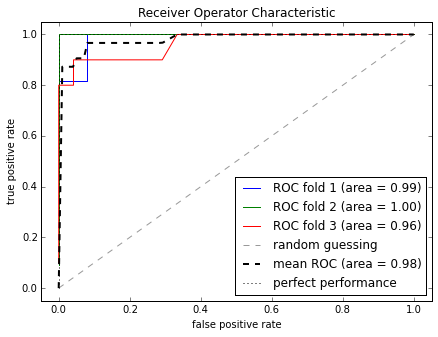

In [11]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                        y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr) # interpolate average roc
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
            tpr,
            lw=1,
            label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
plt.plot([0,1],
         [0,1],
        linestyle='--',
        color=(0.6, 0.6, 0.6),
        label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
              label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0,0,1],
        [0,1,1],
        linestyle=':',
        color='black',
        label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()

### Another dataset

In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',
       header=None)

In [14]:
from sklearn.preprocessing import LabelEncoder
X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)

In [15]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
            train_test_split(X,y, test_size=0.2, random_state=1)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components=2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)
print('Test accuracy: %.3f' % pipe_lr.score(X_test, y_test))

Test accuracy: 0.947


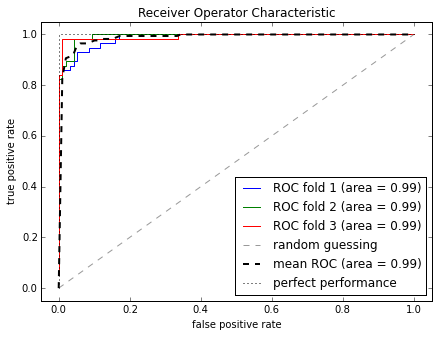

In [17]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold(y_train, n_folds=3, random_state=1)
fig = plt.figure(figsize=(7,5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train[train],
                        y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test], probas[:,1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr) # interpolate average roc
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
            tpr,
            lw=1,
            label='ROC fold %d (area = %0.2f)' % (i+1, roc_auc))
    
plt.plot([0,1],
         [0,1],
        linestyle='--',
        color=(0.6, 0.6, 0.6),
        label='random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
              label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0,0,1],
        [0,1,1],
        linestyle=':',
        color='black',
        label = 'perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")
plt.show()

In [3]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

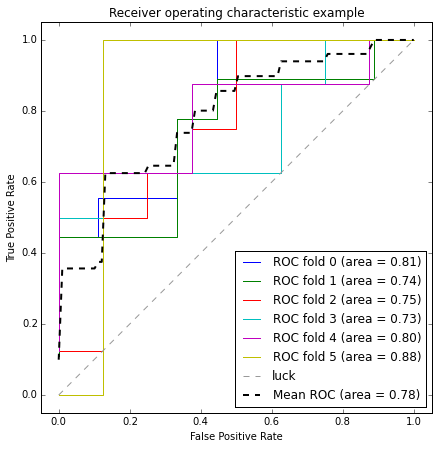

In [15]:
plt.figure(figsize=(7,7))
iris = datasets.load_iris()
X = iris.data
y = iris.target
X, y = X[y!=2], y[y!=2]
n_samples, n_features = X.shape

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Classification and ROC analysis

cv = StratifiedKFold(y, n_folds = 6)
classifier = svm.SVC(kernel = 'linear', probability = True, random_state = random_state)
mean_tpr = 0.0
mean_fpr = np.linspace(0,1,100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    mean_tpr += interp(mean_fpr, fpr, tpr)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw =1, label = 'ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0,1], [0,1], '--', color=(0.6,0.6,0.6), label='luck')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw = 2)
plt.ylim([-0.05, 1.05])
plt.xlim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")